In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

In [6]:
df = pd.read_csv('dados/base_funcionarios_v3 .csv', index_col='id')

In [7]:
df.shape

(46, 4)

In [8]:
df.head()

,Salario,Anos_Educ_Superior,Tempo_Empresa,Tempo_de_Carreira
id,,,,
0,5517.4,3,3,9.777079
1,6399.9,4,6,3.765998
2,6206.7,6,3,7.926264
3,6060.6,4,5,2.233497
4,6122.7,2,9,26.821842


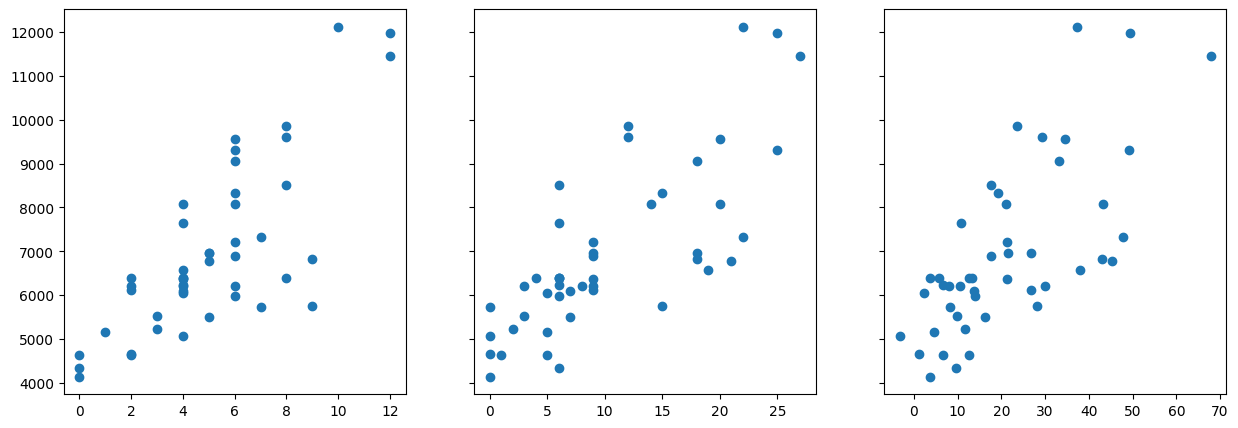

In [9]:
fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, sharey=True, figsize=(15, 5))
ax1.scatter(df['Anos_Educ_Superior'], df['Salario']);
ax2.scatter(df['Tempo_Empresa'], df['Salario']);
ax3.scatter(df['Tempo_de_Carreira'], df['Salario']);

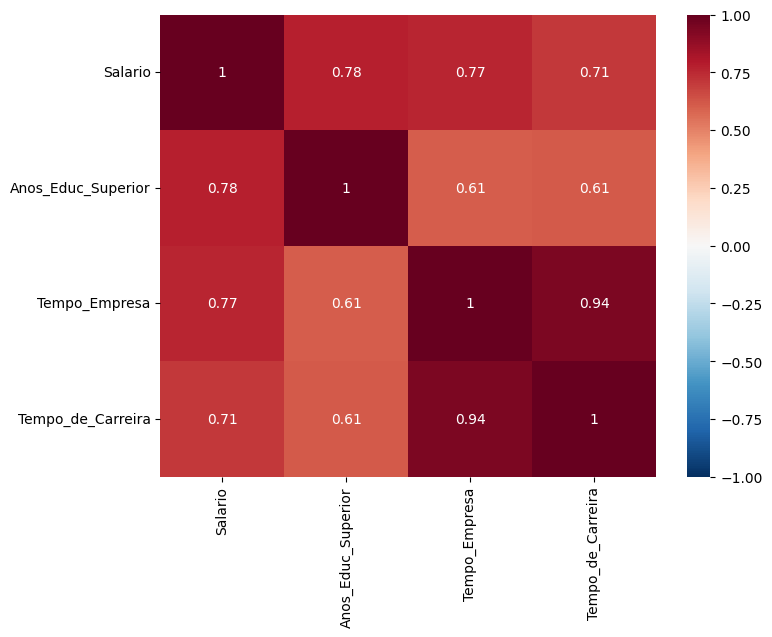

In [11]:
fig = plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), cmap='RdBu_r',
            vmin=-1, vmax=1, annot=True);

In [15]:
y = df['Salario']

df['intercepto'] = 1
x = df[['intercepto','Anos_Educ_Superior', 'Tempo_Empresa', 'Tempo_de_Carreira']]

In [16]:
modelo = sm.OLS(y, x)
resultado = modelo.fit()
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:                Salario   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     41.61
Date:                Mon, 27 May 2024   Prob (F-statistic):           1.21e-12
Time:                        13:14:49   Log-Likelihood:                -380.92
No. Observations:                  46   AIC:                             769.8
Df Residuals:                      42   BIC:                             777.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
intercepto          4053.7618    308

Considerando que relação de causalidade entre **Salário** e **Tempo_Empresa**, e **Salário** e **Tempo_de_Carreira**
são semelhantes, e a dificuldade de obter ambas também é parecida, optou-se por remover a variável **Tempo_de_Carreira** po apresentar **maior p-valor** no teste de hipóteses do respectivo coeficiente.

In [17]:
y = df['Salario']

df['intercepto'] = 1
x = df[['intercepto', 'Anos_Educ_Superior', 'Tempo_Empresa']]

In [18]:
modelo = sm.OLS(y, x)
resultado = modelo.fit()
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:                Salario   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     61.17
Date:                Mon, 27 May 2024   Prob (F-statistic):           2.66e-13
Time:                        13:20:01   Log-Likelihood:                -381.67
No. Observations:                  46   AIC:                             769.3
Df Residuals:                      43   BIC:                             774.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
intercepto          4056.0591    309

### Interpretação dos Coeficientes

intercepto ou $\beta_0$: Salário médio de um colaborador sem educação superior e recém chegado na empresa é de 
R$ 4.056,06.\
$\beta_1$ x anos de Educação Superior: Cada ano adicional de educação superior, mantendo tempo de empresa constante, gera um aumento médio de R$ 335,39.\
$beta_2$ x Tempo de Empresa: Cada ano adicional de tempo de empresa, mantendo os anos de educação superior constante, gera um aumento médio de R$ 117,66.